# Projeto Análise de dados ENEM 2019
## AUTOR: Raoni Henriques da Silva
## OBJETIVO: Analisar a influência das desigualdades sociais no resultado dos candidatos considerando condição sócio-econômica, sexo e raça.
## DADOS: Amostra coletada pela equipe Alura para a semana de imersão em dados a partir da população completa dos candidatos do ENEM 2019.

In [1]:
#@title Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline

In [ ]:
#@title Importação dos dados

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
pd.set_option("display.max_columns", 200)
dados.head()

In [3]:
#@title Cálculo da média das notas dos participantes considerando todos os candidatos (presentes, faltantes e eliminados)

provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados['NU_NOTA_MEDIA'] = round(dados[provas].mean(axis=1))
provas.append("NU_NOTA_MEDIA")

In [4]:
#@title #DataFrame sem a presença das notas médias = 0
dados_sz = dados.query('NU_NOTA_MEDIA != 0')

# 01 - Análise dos dados com base socioeconômica

### Separação do Q006 (Renda mensal da família) por classes conforme definição do IBGE:
#### - Classe E (recebe até 2 salários mínimos): até 1.996,00 BRL (Q006: A, B, C, D)
#### - Classe D (de 2 a 4 salários mínimos): de 1.996,00 BRL até 3.992,00 BRL (Q006: E, F, G)
#### - Classe C (de 4 a 10 salários mínimos): de 3.992,01 BRL até 9.980,00 BRL (Q006: H, I, J, K, L, M)
#### - Classe B (de 10 a 20 salários mínimos): de 9.980,01 BRL até 19.960,00 BRL (Q006: N, O, P)
#### - Classe A (acima de 20 salários mínimos): acima de 19.960,00 BRL (Q006: Q)

In [ ]:
#@title Criação das classes sociais
classe_E = dados.query('Q006 == "A" or Q006 == "B" or Q006 == "C" or Q006 == "D"')
classe_D = dados.query('Q006 == "E" or Q006 == "F" or Q006 == "G"')
classe_C = dados.query('Q006 == "H" or Q006 == "I" or Q006 == "J" or Q006 == "K" or Q006 == "L" or Q006 == "M"')
classe_B = dados.query('Q006 == "N" or Q006 == "O" or Q006 == "P"')
classe_A = dados.query('Q006 == "Q"')
classe_E['CLASSE'] = 'E'
classe_D['CLASSE'] = 'D'
classe_C['CLASSE'] = 'C'
classe_B['CLASSE'] = 'B'
classe_A['CLASSE'] = 'A'

In [ ]:
#@title Adicionando os dados da coluna CLASSE no DF
dados_classe = classe_E.append(classe_D.append(classe_C.append(classe_B.append(classe_A))))
dados_classe.sort_index()

In [7]:
#@title Ordenando as classes
classe_ordenada = dados_classe['CLASSE'].unique()
classe_ordenada.sort()

### 01.1 - Apresentação da proporção de candidatos por classe social.

#### obs: Foi considerado a amostra completa.

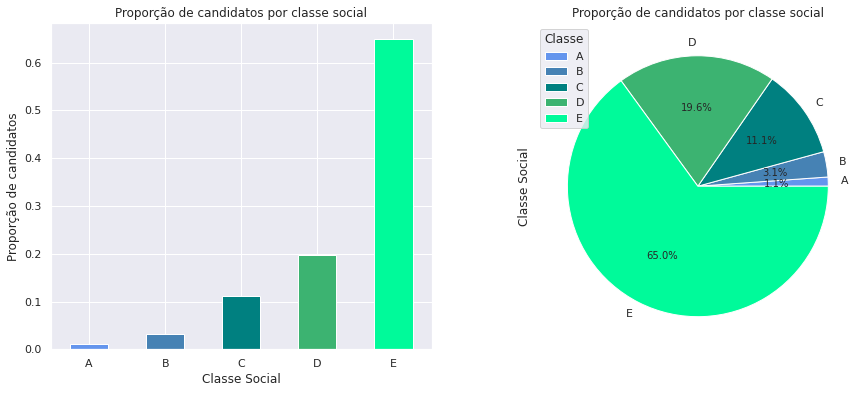

In [300]:
#@title Proporção dos candidatos por classe social
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6),sharey=False)
cmap = cm.get_cmap('winter')
my_colors_grad = ['cornflowerblue', 'steelblue', 'teal', 'mediumseagreen', 'mediumspringgreen']
dados_classe['CLASSE'].value_counts(normalize=True).sort_values().plot(kind='bar',ax = axes[0], 
                                                                       subplots=False, 
                                                                       title='Proporção de candidatos por classe social', 
                                                                       ylabel='Proporção de candidatos', 
                                                                       xlabel='Classe Social', 
                                                                       color=my_colors_grad,
                                                                       rot=0)

dados_classe['CLASSE'].value_counts(normalize=True).sort_values().plot(kind='pie',ax = axes[1], 
                                                                       autopct='%1.1f%%', 
                                                                       subplots=False, 
                                                                       title='Proporção de candidatos por classe social', 
                                                                       label='Classe Social',
                                                                       colors=my_colors_grad)
plt.legend(title='Classe')
plt.show()

#### Conclusão: A proporção de candidatos por classe reflete, provavelmente, a realidade brasileira de uma distribuição de renda desigual, porém o fato de haver muita gente de baixa renda tentando o vestibular mostra uma vontade em tentar mudar essa realidade por parte da população.


#### 01.2 Proporção das classes sociais por regiões do Brasil


In [ ]:
#@title Criação da coluna das regiões no dataframe
centro_oeste = dados_classe.query('SG_UF_RESIDENCIA == "MT" or SG_UF_RESIDENCIA == "MS" or SG_UF_RESIDENCIA == "GO" or SG_UF_RESIDENCIA == "DF"')
norte = dados_classe.query('SG_UF_RESIDENCIA == "AM" or SG_UF_RESIDENCIA == "AC" or SG_UF_RESIDENCIA == "RR" or SG_UF_RESIDENCIA == "RO" or SG_UF_RESIDENCIA == "PA" or SG_UF_RESIDENCIA == "TO" or SG_UF_RESIDENCIA == "AP"')
nordeste = dados_classe.query('SG_UF_RESIDENCIA == "MA" or SG_UF_RESIDENCIA == "CE" or SG_UF_RESIDENCIA == "PI" or SG_UF_RESIDENCIA == "BA" or SG_UF_RESIDENCIA == "SE" or SG_UF_RESIDENCIA == "RN" or SG_UF_RESIDENCIA == "PB" or SG_UF_RESIDENCIA == "PE" or SG_UF_RESIDENCIA == "AL"')
sudeste = dados_classe.query('SG_UF_RESIDENCIA == "SP" or SG_UF_RESIDENCIA == "RJ" or SG_UF_RESIDENCIA == "ES" or SG_UF_RESIDENCIA == "MG"')
sul = dados_classe.query('SG_UF_RESIDENCIA == "PR" or SG_UF_RESIDENCIA == "RS" or SG_UF_RESIDENCIA == "SC"')
centro_oeste['REGIAO_FED'] = 'centro_oeste'
norte['REGIAO_FED'] = 'norte'
nordeste['REGIAO_FED'] = 'nordeste'
sul['REGIAO_FED'] = 'sul'
sudeste['REGIAO_FED'] = 'sudeste'
dados_classe_regiao = centro_oeste.append(norte.append(nordeste.append(sudeste.append(sul))))
dados_classe_regiao.sort_index()

In [10]:
#@title retirando dados nulos e zeros do df
dados_classe_regiao_sz = dados_classe_regiao.dropna(subset=['NU_NOTA_MEDIA'])
dados_classe_regiao_sz = dados_classe_regiao_sz.query('NU_NOTA_MEDIA != 0')

In [11]:
#@title Função para definir a proporção das classes dentro do estado
def prop_classe_regiao(regiao):
  prop_A = regiao.query('CLASSE == "A"').shape[0] / regiao.shape[0]
  prop_B = regiao.query('CLASSE == "B"').shape[0] / regiao.shape[0]
  prop_C = regiao.query('CLASSE == "C"').shape[0] / regiao.shape[0]
  prop_D = regiao.query('CLASSE == "D"').shape[0] / regiao.shape[0]
  prop_E = regiao.query('CLASSE == "E"').shape[0] / regiao.shape[0]
  prop = [prop_A, prop_B, prop_C, prop_D, prop_E]
  return prop

In [12]:
#@title Criação da lista de proporções das classes por região do Brasil
prop_sudeste = prop_classe_regiao(sudeste)
prop_norte = prop_classe_regiao(norte)
prop_nordeste = prop_classe_regiao(nordeste)
prop_centro_oeste = prop_classe_regiao(centro_oeste)
prop_sul = prop_classe_regiao(sul)

prop_br = [prop_sudeste, prop_norte, prop_nordeste, prop_centro_oeste, prop_sul]

In [13]:
#@title Criação do dataframe para de proporções de candidatos por classe por região
df_reg = pd.DataFrame({'Centro Oeste': prop_br[3],
                       'Norte': prop_br[1],
                       'Nordeste': prop_br[2], 
                       'Sudeste': prop_br[0],
                       'Sul': prop_br[4]})
df_reg['CLASSE']=dados_classe['CLASSE'].sort_values().unique()
df_reg = df_reg.set_index('CLASSE')

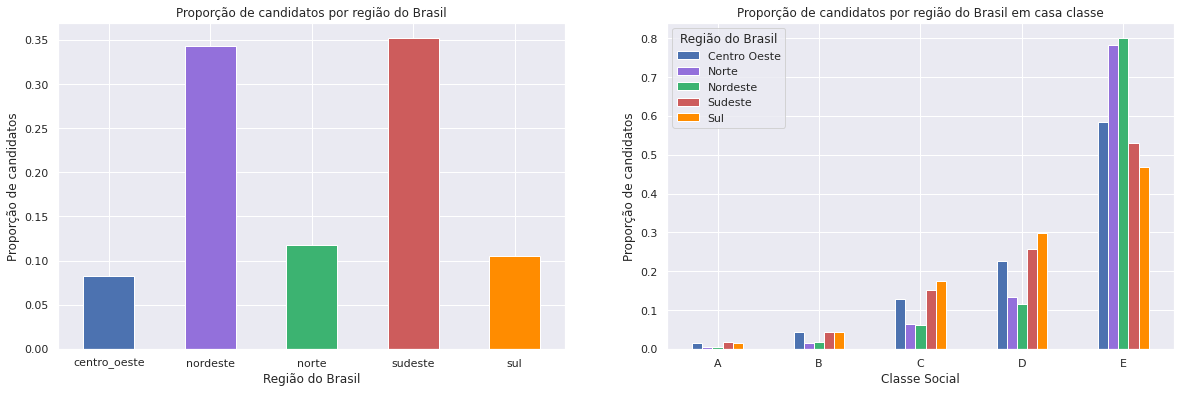

In [303]:
#@title Distribuição de candidatos
my_colors = ['b', 'mediumpurple', 'mediumseagreen', 'indianred', 'darkorange']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6),sharey=False)
dados_classe_regiao['REGIAO_FED'].value_counts(normalize=True).sort_index().plot(ax=axes[0], subplots=False, kind='bar', rot=0,
                                                                    title='Proporção de candidatos por região do Brasil',
                                                                    xlabel='Região do Brasil',
                                                                    ylabel='Proporção de candidatos',
                                                                    color=my_colors,)
df_reg.plot(ax=axes[1], subplots=False, kind='bar', rot=0, title='Proporção de candidatos por região do Brasil em casa classe', 
            color=my_colors, xlabel='Classe Social', ylabel='Proporção de candidatos')

plt.legend(title='Região do Brasil')
plt.show()

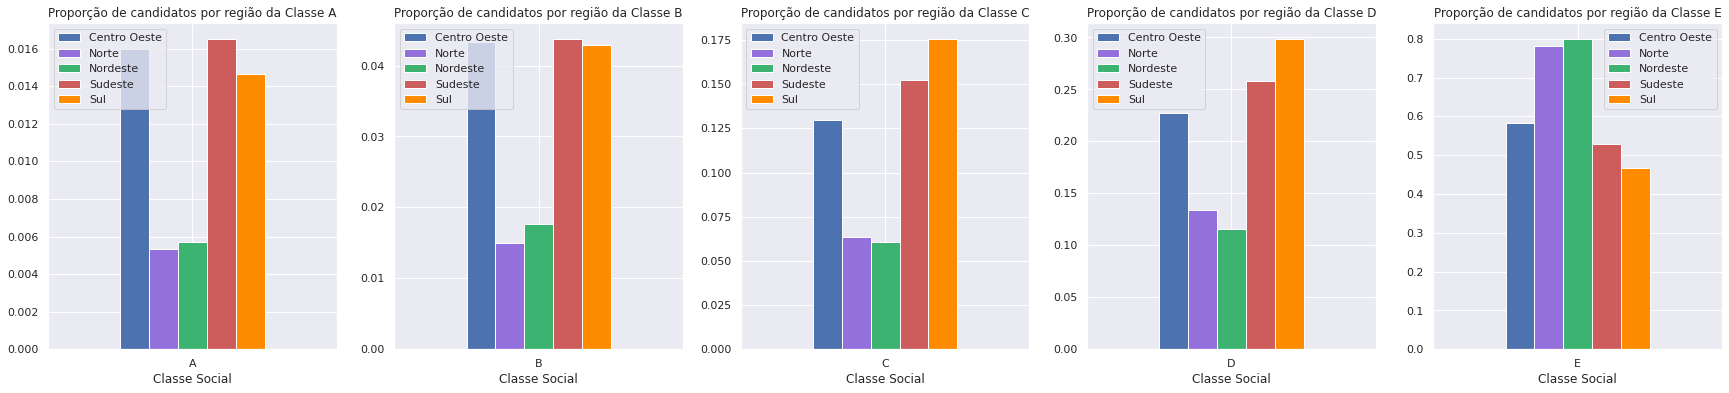

In [15]:
#@title Proporção de candidatos por região do Brasil divididos por classe social
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,6),sharey=False)
df_reg.query('CLASSE == "A"').plot.bar(ax = axes[0], subplots=False, title='Proporção de candidatos por região da Classe A', xlabel="Classe Social", rot=0, color=my_colors)
df_reg.query('CLASSE == "B"').plot.bar(ax = axes[1], subplots=False, title='Proporção de candidatos por região da Classe B', xlabel="Classe Social", rot=0, color=my_colors)
df_reg.query('CLASSE == "C"').plot.bar(ax = axes[2], subplots=False, title='Proporção de candidatos por região da Classe C', xlabel="Classe Social", rot=0, color=my_colors)
df_reg.query('CLASSE == "D"').plot.bar(ax = axes[3], subplots=False, title='Proporção de candidatos por região da Classe D', xlabel="Classe Social", rot=0, color=my_colors)
df_reg.query('CLASSE == "E"').plot.bar(ax = axes[4], subplots=False, title='Proporção de candidatos por região da Classe E', xlabel="Classe Social", rot=0, color=my_colors)
plt.show()

#### Conclusão: Observa-se no gráfico da classe E uma inversão do padrão. As regiões Norte e Nordeste passam a ter uma proporção maior de candidatos nessa classe em comparação com as demais classes.


#### 01.3 Proporção de candidatos Feminino X Masculino por classe social

[]

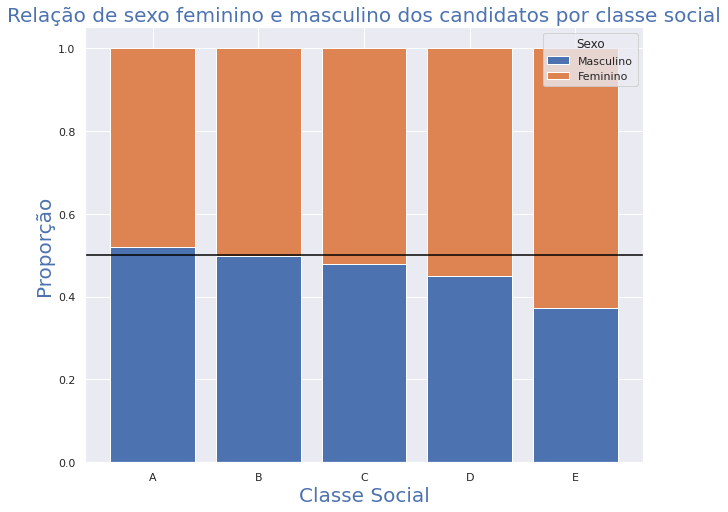

In [306]:
#@title Proporção dos candidatos por classe social
classes = ['A', 'B', 'C', 'D', 'E']
fem = [classe_A['TP_SEXO'].value_counts(normalize=True).sort_index()[0], 
        classe_B['TP_SEXO'].value_counts(normalize=True).sort_index()[0],
        classe_C['TP_SEXO'].value_counts(normalize=True).sort_index()[0],
        classe_D['TP_SEXO'].value_counts(normalize=True).sort_index()[0],
        classe_E['TP_SEXO'].value_counts(normalize=True).sort_index()[0]]
masc = [classe_A['TP_SEXO'].value_counts(normalize=True).sort_index()[1], 
        classe_B['TP_SEXO'].value_counts(normalize=True).sort_index()[1],
        classe_C['TP_SEXO'].value_counts(normalize=True).sort_index()[1],
        classe_D['TP_SEXO'].value_counts(normalize=True).sort_index()[1],
        classe_E['TP_SEXO'].value_counts(normalize=True).sort_index()[1]]
plt.figure(figsize=(10,8))
plt.bar(x=classes, height = masc, label='Masculino')
plt.bar(x=classes, height = fem, bottom=masc, label='Feminino')
plt.axhline(0.5, c='black')
plt.xlabel('Classe Social', {'size':20}).set_color('b')
plt.ylabel('Proporção', {'size':20}).set_color('b')
#plt.ylabel('Proporção cumulativa de candidatos')
plt.title('Relação de sexo feminino e masculino dos candidatos por classe social', {'size':20}).set_color('b')
plt.legend(title='Sexo')
plt.plot()

#### Conclusão: Percebe-se nitidamente um equilíbrio entre candidatos feminino e masculino nas classes mais altas e essa relação vai sendo desequilibrada com um maior número de mulheres em detrimento dos homens nas classes mais baixas o que pode ser reflexo da necessidade dos homens de largar os estudos mais cedo para ajudar financeiramente em casa.

#### 01.4 Média da nota das provas por classe social

#### Entender se há influência da classe social sobre as notas dos candidatos.


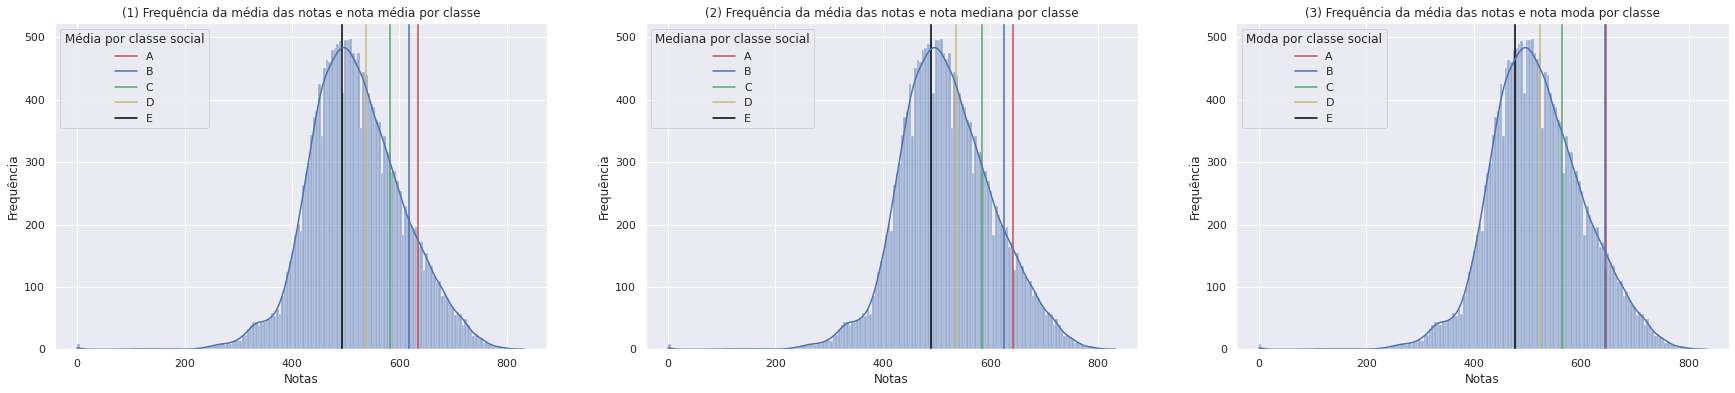

In [307]:
#@title Histograma das notas e nota média (1), nota mediana (2) e moda (3) das classes
plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
plt.axvline(classe_A['NU_NOTA_MEDIA'].mean(), c='r')
plt.axvline(classe_B['NU_NOTA_MEDIA'].mean(), c='b')
plt.axvline(classe_C['NU_NOTA_MEDIA'].mean(), c='g')
plt.axvline(classe_D['NU_NOTA_MEDIA'].mean(), c='y')
plt.axvline(classe_E['NU_NOTA_MEDIA'].mean(), c='black')
sns.histplot(dados_classe_regiao, x='NU_NOTA_MEDIA', kde=True, stat='frequency', cumulative=False)
plt.legend(['A', 'B', 'C', 'D', 'E']).set_title('Média por classe social')
plt.title('(1) Frequência da média das notas e nota média por classe')
plt.xlabel('Notas')
plt.ylabel('Frequência')

plt.subplot(1,3,2)
plt.axvline(classe_A['NU_NOTA_MEDIA'].median(), c='r')
plt.axvline(classe_B['NU_NOTA_MEDIA'].median(), c='b')
plt.axvline(classe_C['NU_NOTA_MEDIA'].median(), c='g')
plt.axvline(classe_D['NU_NOTA_MEDIA'].median(), c='y')
plt.axvline(classe_E['NU_NOTA_MEDIA'].median(), c='black')
sns.histplot(dados_classe_regiao, x='NU_NOTA_MEDIA', kde=True, stat='frequency', cumulative=False)
plt.legend(['A', 'B', 'C', 'D', 'E']).set_title('Mediana por classe social')
plt.title('(2) Frequência da média das notas e nota mediana por classe')
plt.xlabel('Notas')
plt.ylabel('Frequência')

plt.subplot(1,3,3)
plt.axvline(classe_A['NU_NOTA_MEDIA'].mode()[0], c='r')
plt.axvline(classe_B['NU_NOTA_MEDIA'].mode()[0], c='b')
plt.axvline(classe_C['NU_NOTA_MEDIA'].mode()[0], c='g')
plt.axvline(classe_D['NU_NOTA_MEDIA'].mode()[0], c='y')
plt.axvline(classe_E['NU_NOTA_MEDIA'].mode()[0], c='black')
sns.histplot(dados_classe_regiao, x='NU_NOTA_MEDIA', kde=True, stat='frequency', cumulative=False)
plt.legend(['A', 'B', 'C', 'D', 'E']).set_title('Moda por classe social')
plt.title('(3) Frequência da média das notas e nota moda por classe')
plt.xlabel('Notas')
plt.ylabel('Frequência')

plt.show()
#my_colors_grad = ['cornflowerblue', 'steelblue', 'teal', 'mediumseagreen', 'mediumspringgreen']

#### Conclusão: Percebe-se através dos três histogramas que há uma grande diferença nas notas de acordo com a classe social. Provavelmente por conta da diferença do nível do ensino básico entre as classes, aumentando cada vez mais o abismo.

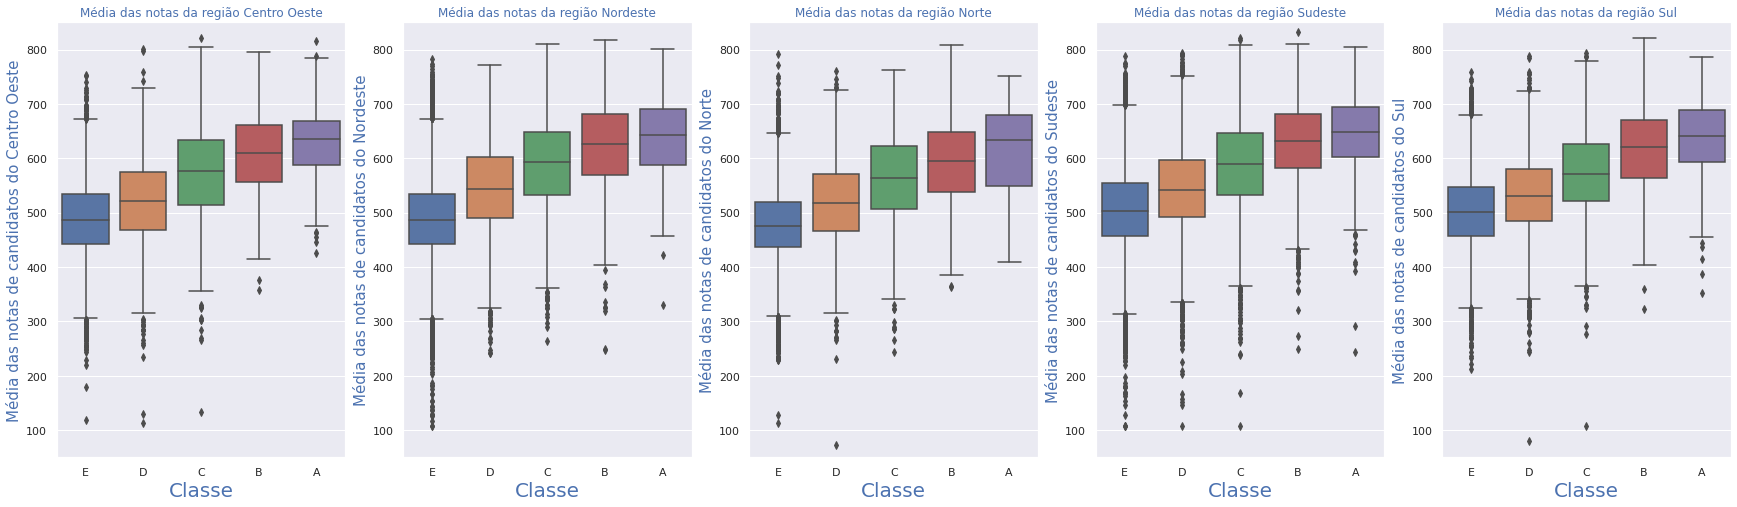

In [311]:
#@title Histograma da média das notas por região em cada região do Brasil
plt.figure(figsize=(30,8))
plt.subplot(1,5,1)
sns.boxplot(x='CLASSE', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('REGIAO_FED == "centro_oeste"'))
plt.title('Média das notas da região Centro Oeste').set_color('b')
plt.ylabel('Média das notas de candidatos do Centro Oeste', {'size':15}).set_color('b')
plt.xlabel('Classe', {'size':20}).set_color('b')
plt.ylim(50,850)

plt.subplot(1,5,2)
sns.boxplot(x='CLASSE', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('REGIAO_FED == "nordeste"'))
plt.title('Média das notas da região Nordeste').set_color('b')
plt.ylabel('Média das notas de candidatos do Nordeste', {'size':15}).set_color('b')
plt.xlabel('Classe', {'size':20}).set_color('b')
plt.ylim(50,850)

plt.subplot(1,5,3)
sns.boxplot(x='CLASSE', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('REGIAO_FED == "norte"'))
plt.title('Média das notas da região Norte').set_color('b')
plt.ylabel('Média das notas de candidatos do Norte', {'size':15}).set_color('b')
plt.xlabel('Classe', {'size':20}).set_color('b')
plt.ylim(50,850)

plt.subplot(1,5,4)
sns.boxplot(x='CLASSE', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('REGIAO_FED == "sudeste"'))
plt.title('Média das notas da região Sudeste').set_color('b')
plt.ylabel('Média das notas de candidatos do Sudeste', {'size':15}).set_color('b')
plt.xlabel('Classe', {'size':20}).set_color('b')
plt.ylim(50,850)

plt.subplot(1,5,5)
sns.boxplot(x='CLASSE', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('REGIAO_FED == "sul"'))
plt.title('Média das notas da região Sul').set_color('b')
plt.ylabel('Média das notas de candidatos do Sul', {'size':15}).set_color('b')
plt.xlabel('Classe', {'size':20}).set_color('b')
plt.ylim(50,850)


plt.show()

#### Conclusão: Os cinco histogramas separados por região do Brasil confirmam que existe sim uma diferença de notas de acordo com sua classe porém essa diferença se repete de forma semelhante em todos as regiões, ou seja ser rico ou pobre em diferentes regiões do Brasil pouco afetam no rendimento do candidato.

# 02 - Análise de dados por Região

#### Entender se há alguma influência da região do candidato nas notas do ENEM.

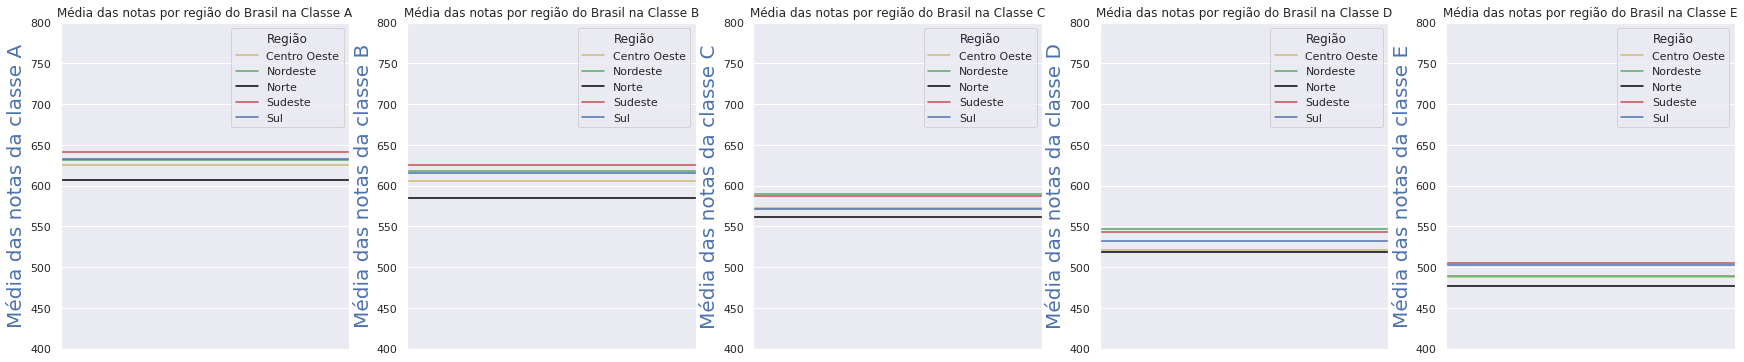

In [313]:
#@title Média das notas por região em cada classe social
regioes = ['Centro Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']
plt.figure(figsize=(30,6))
plt.subplot(1,5,1)
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "centro_oeste"').query('CLASSE == "A"')['NU_NOTA_MEDIA'].mean(), c='y')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "nordeste"').query('CLASSE == "A"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "norte"').query('CLASSE == "A"')['NU_NOTA_MEDIA'].mean(), c='black')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sudeste"').query('CLASSE == "A"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sul"').query('CLASSE == "A"')['NU_NOTA_MEDIA'].mean(), c='b')
plt.ylim(400, 800)
plt.xticks([])
plt.ylabel('Média das notas da classe A', {'size':20}).set_color('b')
plt.title('Média das notas por região do Brasil na Classe A')
plt.legend(regioes).set_title('Região')


plt.subplot(1,5,2)
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "centro_oeste"').query('CLASSE == "B"')['NU_NOTA_MEDIA'].mean(), c='y')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "nordeste"').query('CLASSE == "B"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "norte"').query('CLASSE == "B"')['NU_NOTA_MEDIA'].mean(), c='black')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sudeste"').query('CLASSE == "B"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sul"').query('CLASSE == "B"')['NU_NOTA_MEDIA'].mean(), c='b')
plt.ylim(400, 800)
plt.xticks([])
plt.ylabel('Média das notas da classe B', {'size':20}).set_color('b')
plt.title('Média das notas por região do Brasil na Classe B')
plt.legend(regioes).set_title('Região')

plt.subplot(1,5,3)
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "centro_oeste"').query('CLASSE == "C"')['NU_NOTA_MEDIA'].mean(), c='y')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "nordeste"').query('CLASSE == "C"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "norte"').query('CLASSE == "C"')['NU_NOTA_MEDIA'].mean(), c='black')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sudeste"').query('CLASSE == "C"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sul"').query('CLASSE == "C"')['NU_NOTA_MEDIA'].mean(), c='b')
plt.ylim(400, 800)
plt.xticks([])
plt.ylabel('Média das notas da classe C', {'size':20}).set_color('b')
plt.title('Média das notas por região do Brasil na Classe C')
plt.legend(regioes).set_title('Região')

plt.subplot(1,5,4)
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "centro_oeste"').query('CLASSE == "D"')['NU_NOTA_MEDIA'].mean(), c='y')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "nordeste"').query('CLASSE == "D"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "norte"').query('CLASSE == "D"')['NU_NOTA_MEDIA'].mean(), c='black')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sudeste"').query('CLASSE == "D"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sul"').query('CLASSE == "D"')['NU_NOTA_MEDIA'].mean(), c='b')
plt.ylim(400, 800)
plt.xticks([])
plt.ylabel('Média das notas da classe D', {'size':20}).set_color('b')
plt.title('Média das notas por região do Brasil na Classe D')
plt.legend(regioes).set_title('Região')

plt.subplot(1,5,5)
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "centro_oeste"').query('CLASSE == "E"')['NU_NOTA_MEDIA'].mean(), c='y')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "nordeste"').query('CLASSE == "E"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "norte"').query('CLASSE == "E"')['NU_NOTA_MEDIA'].mean(), c='black')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sudeste"').query('CLASSE == "E"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.axhline(dados_classe_regiao.query('REGIAO_FED == "sul"').query('CLASSE == "E"')['NU_NOTA_MEDIA'].mean(), c='b')
plt.ylim(400, 800)
plt.xticks([])
plt.ylabel('Média das notas da classe E', {'size':20}).set_color('b')
plt.title('Média das notas por região do Brasil na Classe E')
plt.legend(regioes).set_title('Região')

plt.show()

#### Conclusão: Pela análise dos cinco gráficos podemos concluir que não há variação significativa na média das notas por Região do Brasil, mas sim por classe.

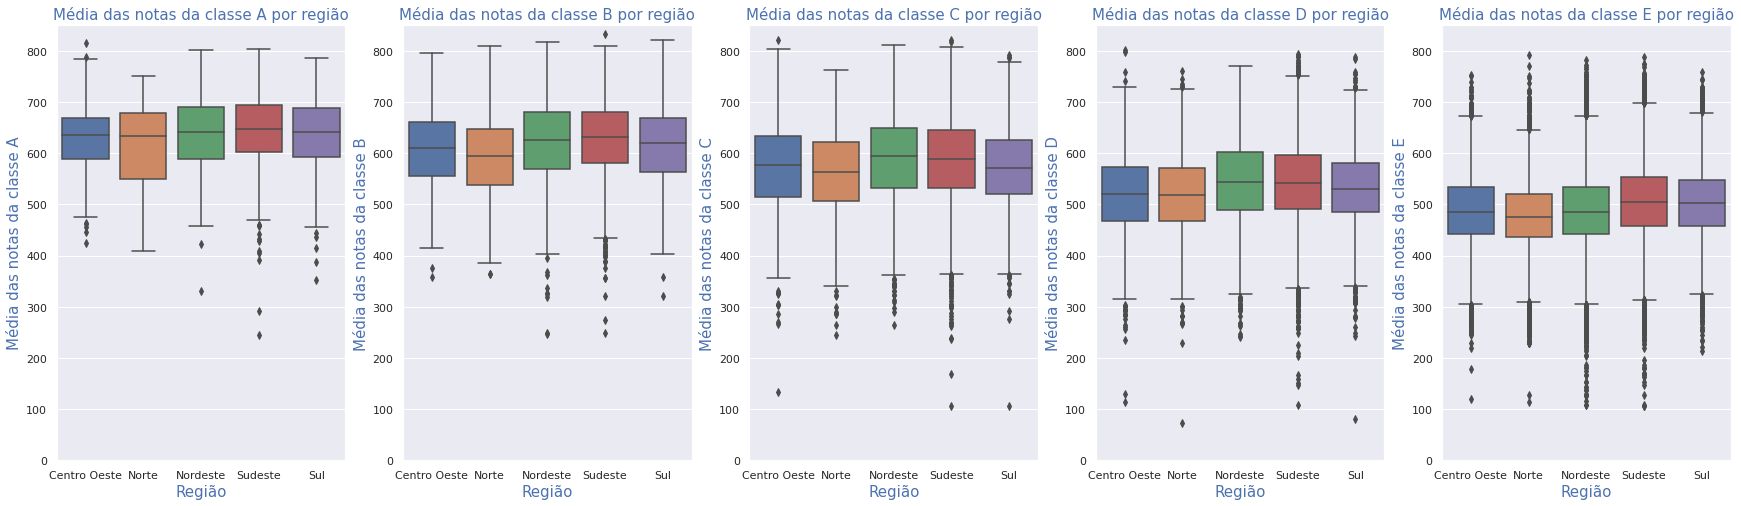

In [315]:
#@title Histograma da média das notas por região por classe social
plt.figure(figsize=(30,8))
plt.subplot(1,5,1)
sns.boxplot(x='REGIAO_FED', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('CLASSE == "A"'))
plt.title('Média das notas da classe A por região', {'size':15}).set_color('b')
plt.xticks(np.arange(5), ('Centro Oeste', 'Norte', 'Nordeste', 'Sudeste', 'Sul'))
plt.ylabel('Média das notas da classe A', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.ylim(0,850)

plt.subplot(1,5,2)
sns.boxplot(x='REGIAO_FED', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('CLASSE == "B"'))
plt.title('Média das notas da classe B por região', {'size':15}).set_color('b')
plt.xticks(np.arange(5), ('Centro Oeste', 'Norte', 'Nordeste', 'Sudeste', 'Sul'))
plt.ylabel('Média das notas da classe B', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.ylim(0,850)

plt.subplot(1,5,3)
sns.boxplot(x='REGIAO_FED', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('CLASSE == "C"'))
plt.title('Média das notas da classe C por região', {'size':15}).set_color('b')
plt.xticks(np.arange(5), ('Centro Oeste', 'Norte', 'Nordeste', 'Sudeste', 'Sul'))
plt.ylabel('Média das notas da classe C', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.ylim(0,850)

plt.subplot(1,5,4)
sns.boxplot(x='REGIAO_FED', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('CLASSE == "D"'))
plt.title('Média das notas da classe D por região', {'size':15}).set_color('b')
plt.xticks(np.arange(5), ('Centro Oeste', 'Norte', 'Nordeste', 'Sudeste', 'Sul'))
plt.ylabel('Média das notas da classe D', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.ylim(0,850)

plt.subplot(1,5,5)
sns.boxplot(x='REGIAO_FED', y = 'NU_NOTA_MEDIA', data = dados_classe_regiao_sz.query('CLASSE == "E"'))
plt.title('Média das notas da classe E por região', {'size':15}).set_color('b')
plt.xticks(np.arange(5), ('Centro Oeste', 'Norte', 'Nordeste', 'Sudeste', 'Sul'))
plt.ylabel('Média das notas da classe E', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.ylim(0,850)

plt.show()

#### Conclusão: Pela análise dos cinco histogramas, assim como nos cinco gráficos anteriores, podemos concluir que não há variação significativa na média das notas por Região do Brasil, mas sim por classe social.

# 03 - Análise dos dados com base no sexo do candidato
### Analisar se existe alguma influência nos resultados baseado no sexo do candidato

#### Como já visto anteriormente no item 01.3 nas classes mais baixas há uma maior presença de candidatos do sexo feminino em detrimento do masculino, porém será que há alguma relação entre o sexo do candidato e suas notas?

[]

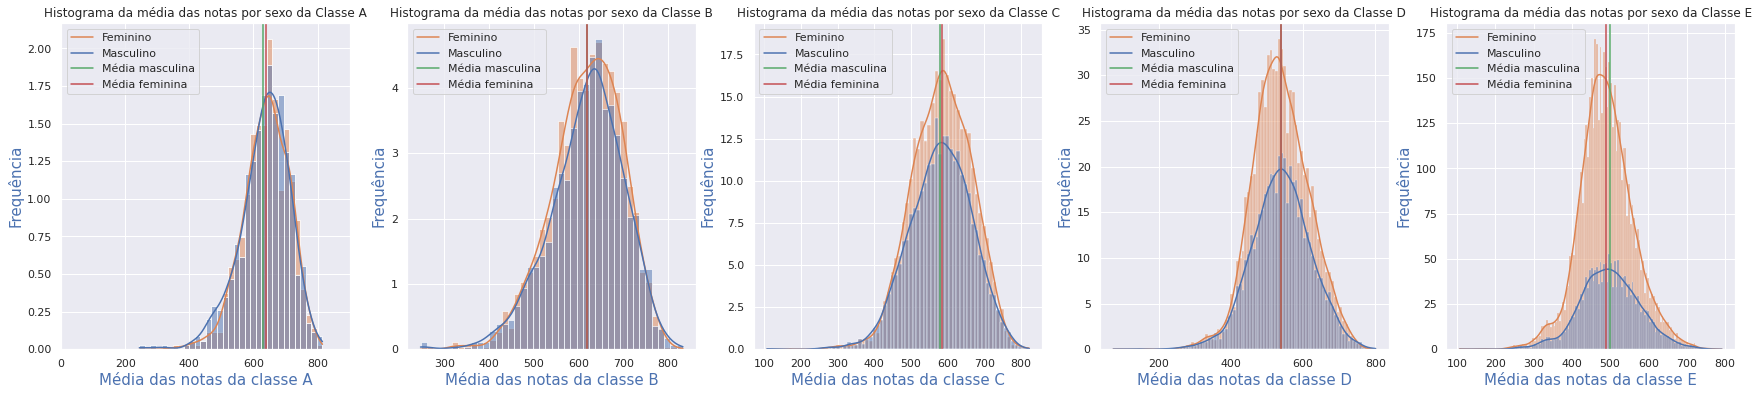

In [316]:
#@title Histogramas das notas médias por gênero
plt.figure(figsize=(30,6))

plt.subplot(1,5,1)
sns.histplot(dados_classe_regiao_sz.query('CLASSE == "A"'), x='NU_NOTA_MEDIA', hue='TP_SEXO', kde=True, stat='frequency', cumulative=False)
plt.axvline(classe_A.query('TP_SEXO == "M"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axvline(classe_A.query('TP_SEXO == "F"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.legend(['Feminino', 'Masculino', 'Média masculina', 'Média feminina'])
plt.xlabel('Média das notas da classe A', {'size':15}).set_color('b')
plt.ylabel('Frequência', {'size':15}).set_color('b')
plt.title('Histograma da média das notas por sexo da Classe A')
plt.xlim(0,900)

plt.subplot(1,5,2,)
sns.histplot(dados_classe_regiao_sz.query('CLASSE == "B"'), x='NU_NOTA_MEDIA', hue='TP_SEXO', kde=True, stat='frequency', cumulative=False)
plt.axvline(classe_B.query('TP_SEXO == "M"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axvline(classe_B.query('TP_SEXO == "F"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.legend(['Feminino', 'Masculino', 'Média masculina', 'Média feminina'])
plt.xlabel('Média das notas da classe B', {'size':15}).set_color('b')
plt.ylabel('Frequência', {'size':15}).set_color('b')
plt.title('Histograma da média das notas por sexo da Classe B')

plt.subplot(1,5,3,)
sns.histplot(dados_classe_regiao_sz.query('CLASSE == "C"'), x='NU_NOTA_MEDIA', hue='TP_SEXO', kde=True, stat='frequency', cumulative=False)
plt.axvline(classe_C.query('TP_SEXO == "M"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axvline(classe_C.query('TP_SEXO == "F"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.legend(['Feminino', 'Masculino', 'Média masculina', 'Média feminina'])
plt.xlabel('Média das notas da classe C', {'size':15}).set_color('b')
plt.ylabel('Frequência', {'size':15}).set_color('b')
plt.title('Histograma da média das notas por sexo da Classe C')

plt.subplot(1,5,4,)
sns.histplot(dados_classe_regiao_sz.query('CLASSE == "D"'), x='NU_NOTA_MEDIA', hue='TP_SEXO', kde=True, stat='frequency', cumulative=False)
plt.axvline(classe_D.query('TP_SEXO == "M"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axvline(classe_D.query('TP_SEXO == "F"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.legend(['Feminino', 'Masculino', 'Média masculina', 'Média feminina'])
plt.xlabel('Média das notas da classe D', {'size':15}).set_color('b')
plt.ylabel('Frequência', {'size':15}).set_color('b')
plt.title('Histograma da média das notas por sexo da Classe D')

plt.subplot(1,5,5,)
sns.histplot(dados_classe_regiao_sz.query('CLASSE == "E"'), x='NU_NOTA_MEDIA', hue='TP_SEXO', kde=True, stat='frequency', cumulative=False)
plt.axvline(classe_E.query('TP_SEXO == "M"')['NU_NOTA_MEDIA'].mean(), c='g')
plt.axvline(classe_E.query('TP_SEXO == "F"')['NU_NOTA_MEDIA'].mean(), c='r')
plt.legend(['Feminino', 'Masculino', 'Média masculina', 'Média feminina'])
plt.xlabel('Média das notas da classe E', {'size':15}).set_color('b')
plt.ylabel('Frequência', {'size':15}).set_color('b')
plt.title('Histograma da média das notas por sexo da Classe E')

plt.plot()

#### Conclusão: Apesar de evidenciar novamente uma crescente proporção de mulheres nas classes mais baixas em detrimento dos homens, não há uma diferença significativa nas notas finais por gênero

#### 03.1 Média das notas de Ciências da natureza (ciências da natureza e matemática) X Ciências humanas (linguagens e códigos, ciências humanas e redação) por sexo

#### Entender se o pré-conceito existente na sociedade de que as mulheres são menos interessadas por áreas mais exatas tem alguma base

In [273]:
#@title Criação das colunas Nota Exatas e Nota Humanas
dados_classe_regiao['NU_NOTA_EXATAS'] = round((dados_classe_regiao['NU_NOTA_CN'] + dados_classe_regiao['NU_NOTA_MT'])/2)
dados_classe_regiao['NU_NOTA_HUMANAS'] = round((dados_classe_regiao['NU_NOTA_CH'] + dados_classe_regiao['NU_NOTA_LC'])/2)


In [278]:
#@title Criação do dataframe com os dados das notas médias dos tipos de provas por sexo
df_sexo_exata_humamans = pd.DataFrame({'Feminino': [dados_classe_regiao.query('TP_SEXO == "F"')['NU_NOTA_EXATAS'].mean(),
                                                    dados_classe_regiao.query('TP_SEXO == "F"')['NU_NOTA_HUMANAS'].mean(),
                                                    dados_classe_regiao.query('TP_SEXO == "F"')['NU_NOTA_REDACAO'].mean()],
                                       'Masculino': [dados_classe_regiao.query('TP_SEXO == "M"')['NU_NOTA_EXATAS'].mean(),
                                                    dados_classe_regiao.query('TP_SEXO == "M"')['NU_NOTA_HUMANAS'].mean(),
                                                    dados_classe_regiao.query('TP_SEXO == "M"')['NU_NOTA_REDACAO'].mean()],
                                       'Tipo': ['Exatas', 'Humanas', 'Redação']})
df_sexo_exata_humamans = df_sexo_exata_humamans.set_index('Tipo')

                                       

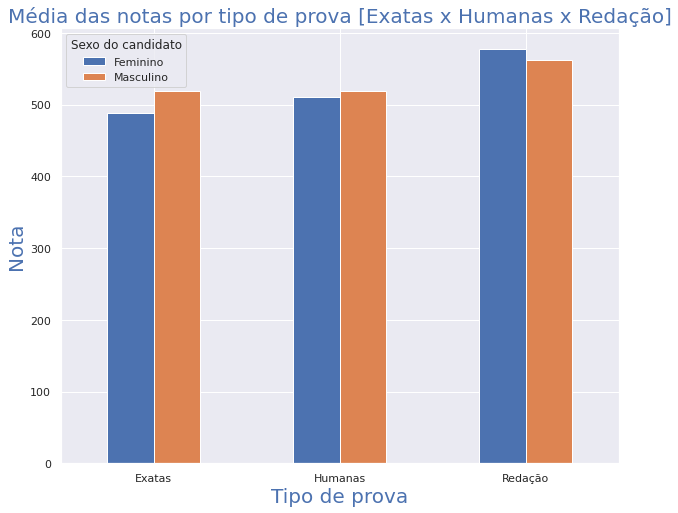

In [295]:
#@title Gráfico da média das notas por tipo de prova
df_sexo_exata_humamans.plot.bar(rot=0, figsize=(10,8))
plt.xlabel('Tipo de prova',  {'size':20}).set_color('b')
plt.ylabel('Nota', {'size':20}).set_color('b')
plt.title('Média das notas por tipo de prova [Exatas x Humanas x Redação]', {'size':20}).set_color('b')
plt.legend(title='Sexo do candidato')
plt.show()

#### Conclusão: Não há evidência de alguma concreta de que a mulher tenha notas piores em assuntos relacionados a ciências da natureza e exatas. A diferença das notas é muito pequena.

# 04 - Análise dos dados com base em raça

### Entender a distribuição dos dados do ENEM com base na raça dos candidatos.

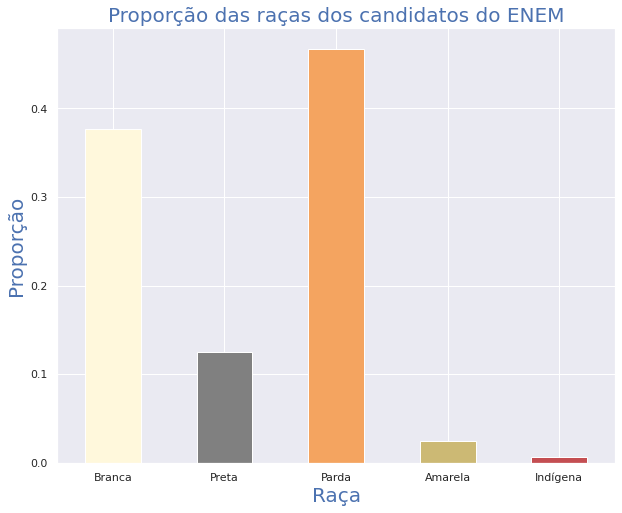

In [319]:
#@title Proporção das raças dos candidatos do ENEM
my_colors_race = ['cornsilk', 'gray', 'sandybrown', 'y', 'r']
raca_dict = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
dados_classe_regiao_sz.query('TP_COR_RACA != 0')['TP_COR_RACA'].value_counts(normalize=True).sort_index().plot.bar(rot=0, color=my_colors_race, figsize=(10,8))
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Proporção', {'size':20}).set_color('b')
plt.xlabel('Raça', {'size':20}).set_color('b')
plt.title('Proporção das raças dos candidatos do ENEM', {'size':20}).set_color('b')
plt.show()


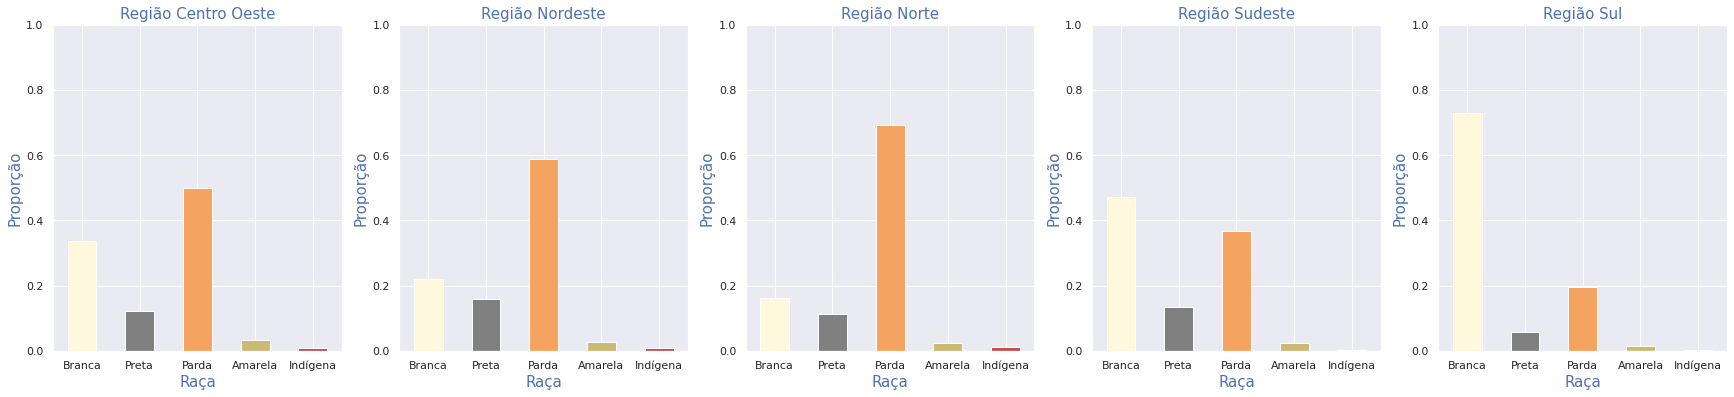

In [320]:
#@title Distribuição das raças dos candidatos do ENEM por região do Brasil
plt.figure(figsize=(30,6))

plt.subplot(1,5,1)
dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "centro_oeste"')['TP_COR_RACA'].value_counts(normalize=True).sort_index().plot.bar(rot=0, color=my_colors_race)
plt.ylim(0,1)
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Raça', {'size':15}).set_color('b')
plt.title('Região Centro Oeste', {'size':15}).set_color('b')

plt.subplot(1,5,2)
dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "nordeste"')['TP_COR_RACA'].value_counts(normalize=True).sort_index().plot.bar(rot=0, color=my_colors_race)
plt.ylim(0,1)
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Raça', {'size':15}).set_color('b')
plt.title('Região Nordeste', {'size':15}).set_color('b')


plt.subplot(1,5,3)
dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "norte"')['TP_COR_RACA'].value_counts(normalize=True).sort_index().plot.bar(rot=0, color=my_colors_race)
plt.ylim(0,1)
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Raça', {'size':15}).set_color('b')
plt.title('Região Norte', {'size':15}).set_color('b')

plt.subplot(1,5,4)
dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "sudeste"')['TP_COR_RACA'].value_counts(normalize=True).sort_index().plot.bar(rot=0, color=my_colors_race)
plt.ylim(0,1)
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Raça', {'size':15}).set_color('b')
plt.title('Região Sudeste', {'size':15}).set_color('b')

plt.subplot(1,5,5)
dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "sul"')['TP_COR_RACA'].value_counts(normalize=True).sort_index().plot.bar(rot=0, color=my_colors_race)
plt.ylim(0,1)
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Raça', {'size':15}).set_color('b')
plt.title('Região Sul', {'size':15}).set_color('b')


plt.show()

#### Conclusão: A participação de pardos é predominante nas regiões Centro Oeste, Nordeste e Norte e a participação da população branca é superior às demais nas regiões Sudeste e Sul sendo que neste última a diferença chama a atenção. Estes dados refletem a população de imigrantes europeus predominantes no Sul do País.

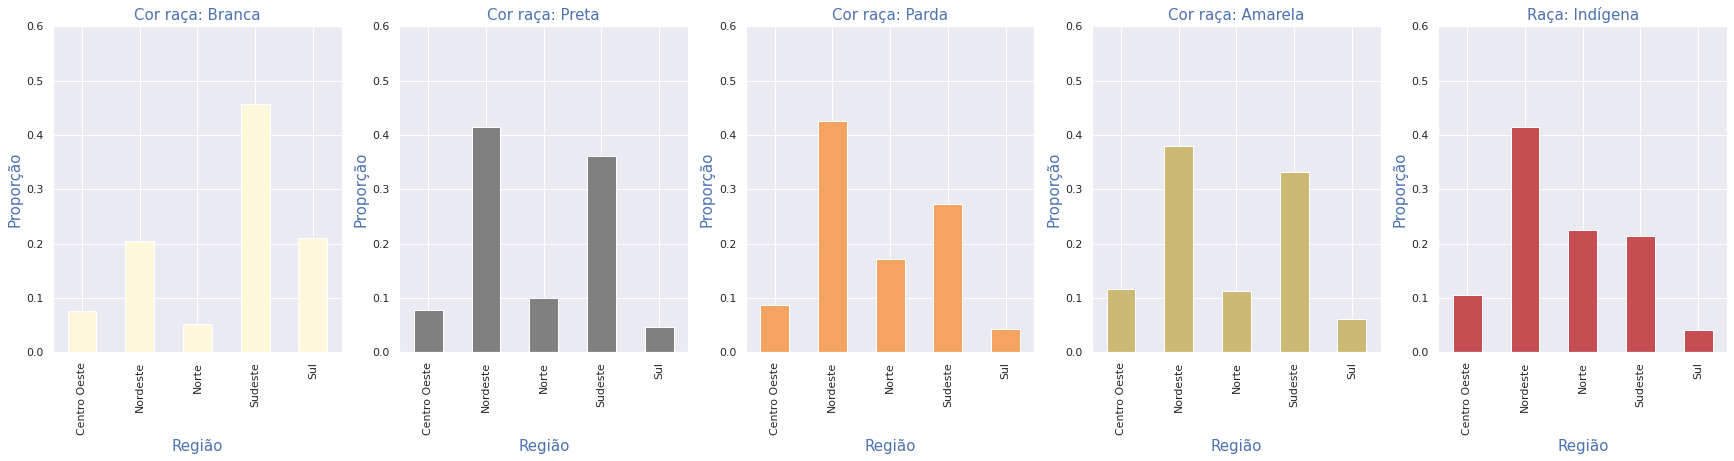

In [321]:
#@title Distribuição dos candidatos do ENEM por região do Brasil por raça do candidato
plt.figure(figsize=(30,6))

plt.subplot(1,5,1)
dados_classe_regiao.query('TP_COR_RACA == 1')['REGIAO_FED'].value_counts(normalize=True).sort_index().plot.bar(color=my_colors_race[0])
plt.ylim(0,0.6)
plt.xticks(np.arange(5), regioes)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Cor raça: Branca', {'size':15}).set_color('b')

plt.subplot(1,5,2)
dados_classe_regiao.query('TP_COR_RACA == 2')['REGIAO_FED'].value_counts(normalize=True).sort_index().plot.bar(color=my_colors_race[1])
plt.ylim(0,0.6)
plt.xticks(np.arange(5), regioes)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Cor raça: Preta', {'size':15}).set_color('b')

plt.subplot(1,5,3)
dados_classe_regiao.query('TP_COR_RACA == 3')['REGIAO_FED'].value_counts(normalize=True).sort_index().plot.bar(color=my_colors_race[2])
plt.ylim(0,0.6)
plt.xticks(np.arange(5), regioes)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Cor raça: Parda', {'size':15}).set_color('b')


plt.subplot(1,5,4)
dados_classe_regiao.query('TP_COR_RACA == 4')['REGIAO_FED'].value_counts(normalize=True).sort_index().plot.bar(color=my_colors_race[3])
plt.ylim(0,0.6)
plt.xticks(np.arange(5), regioes)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Cor raça: Amarela', {'size':15}).set_color('b')

plt.subplot(1,5,5)
dados_classe_regiao.query('TP_COR_RACA == 5')['REGIAO_FED'].value_counts(normalize=True).sort_index().plot.bar(color=my_colors_race[4])
plt.ylim(0,0.6)
plt.xticks(np.arange(5), regioes)
plt.ylabel('Proporção', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Raça: Indígena', {'size':15}).set_color('b')


plt.show()

#### Conclusão: Na análise de distribuição das raças por regiões temos uma predominância de brancos no Sudeste, negros e pardos no sudeste e nordeste e na raça indígena o maior "contribuidor" é o Nordeste.

In [ ]:
#@title DataFrame da proporção de raça por região do Brasil
raca_serie = pd.Series(raca_dict)
raca_serie.index = np.arange(1, len(raca_serie)+1)
df_raca = pd.DataFrame({'Centro Oeste': dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "centro_oeste"')['TP_COR_RACA'].value_counts(normalize=True).sort_index(),
                        'Nordeste': dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "nordeste"')['TP_COR_RACA'].value_counts(normalize=True).sort_index(),
                        'Norte': dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "norte"')['TP_COR_RACA'].value_counts(normalize=True).sort_index(),
                        'Sudeste': dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "sudeste"')['TP_COR_RACA'].value_counts(normalize=True).sort_index(),
                        'Sul': dados_classe_regiao.query('TP_COR_RACA != 0').query('REGIAO_FED == "sul"')['TP_COR_RACA'].value_counts(normalize=True).sort_index(),
                        'COR_RACA': raca_serie
                        })
df_raca = df_raca.set_index('COR_RACA')
df_raca

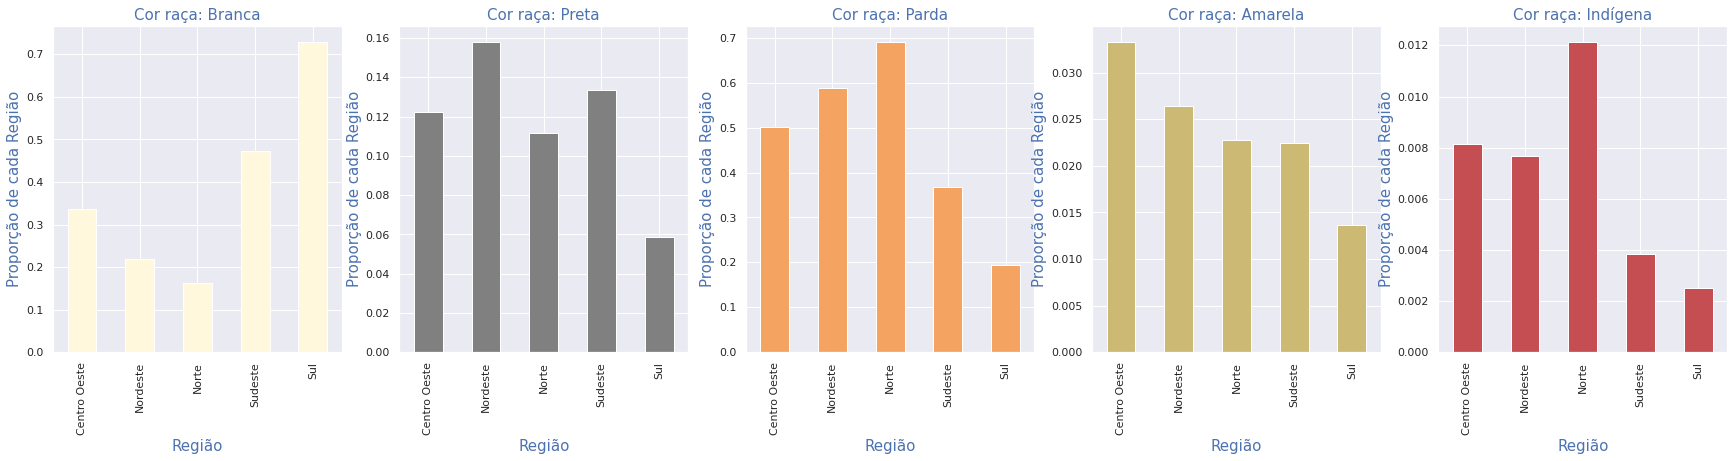

In [322]:
#@title Distribuição das proporções das raças dos candidatos do ENEM por região do Brasil agrupados por raça
plt.figure(figsize=(30,6))

plt.subplot(1,5,1)
df_raca.transpose()['Branca'].plot.bar(color=my_colors_race[0])
#plt.ylim(0,0.8)
plt.ylabel('Proporção de cada Região', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Cor raça: Branca', {'size':15}).set_color('b')


plt.subplot(1,5,2)
df_raca.transpose()['Preta'].plot.bar(color=my_colors_race[1])
#plt.ylim(0,0.8)
plt.ylabel('Proporção de cada Região', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Cor raça: Preta', {'size':15}).set_color('b')



plt.subplot(1,5,3)
df_raca.transpose()['Parda'].plot.bar(color=my_colors_race[2])
#plt.ylim(0,0.8)
plt.ylabel('Proporção de cada Região', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Cor raça: Parda', {'size':15}).set_color('b')



plt.subplot(1,5,4)
df_raca.transpose()['Amarela'].plot.bar(color=my_colors_race[3])
#plt.ylim(0,0.1)
plt.ylabel('Proporção de cada Região', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Cor raça: Amarela', {'size':15}).set_color('b')


plt.subplot(1,5,5)
df_raca.transpose()['Indígena'].plot.bar(color=my_colors_race[4])
#plt.ylim(0,0.1)
plt.ylabel('Proporção de cada Região', {'size':15}).set_color('b')
plt.xlabel('Região', {'size':15}).set_color('b')
plt.title('Cor raça: Indígena', {'size':15}).set_color('b')



plt.show()

#### Conclusão: O sul tem uma proporção relativa à sua população branca, muito maior enquanto que na população indígena o Norte tem uma maior proporção de indígenas relativamente à sua população que às demais regiões. A proporção relativa de negros é bem distribuída, com exceção da região Sul.

### 04.1 - Análise das notas dos candidatos por raça

#### Entender se a raça influencia nas notas dos candidatos.

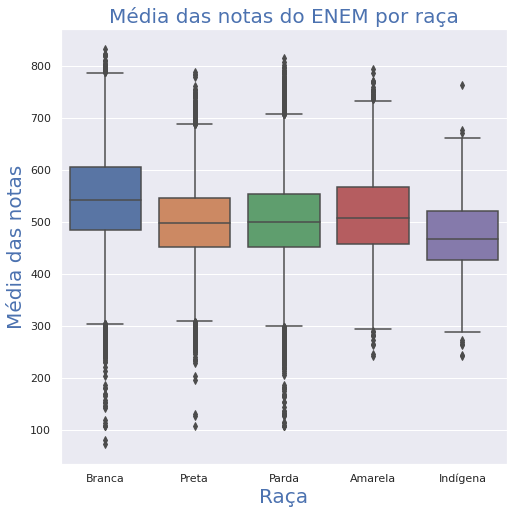

In [212]:
#@title Histograma da nota dos candidatos por raça
plt.figure(figsize=(8,8))
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0'))
plt.title('Média das notas do ENEM por raça',{'size':20}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Média das notas',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.show()

#### Conclusão: É possível notar uma diferença com notas maiores para a raça branca e inferiores para a raça indígena, enquanto que as demais estão equilibradas. Porém é necessário retirar o fator classe, uma vez que os brancos estão majoritariamente na classe A e os indígenas, por sua vez não tem nenhum representante nessa classe.

#### 04.1.1 - Análise das notas dos candidatos por raça por região do Brasil

#### Entender qual é a influência que viver em uma região faz nos candidatos por raça divididos por classe. Desta forma podemos entender os dados sem a classe influenciando e se é favorável ser rico/pobre em qual região do Brasil

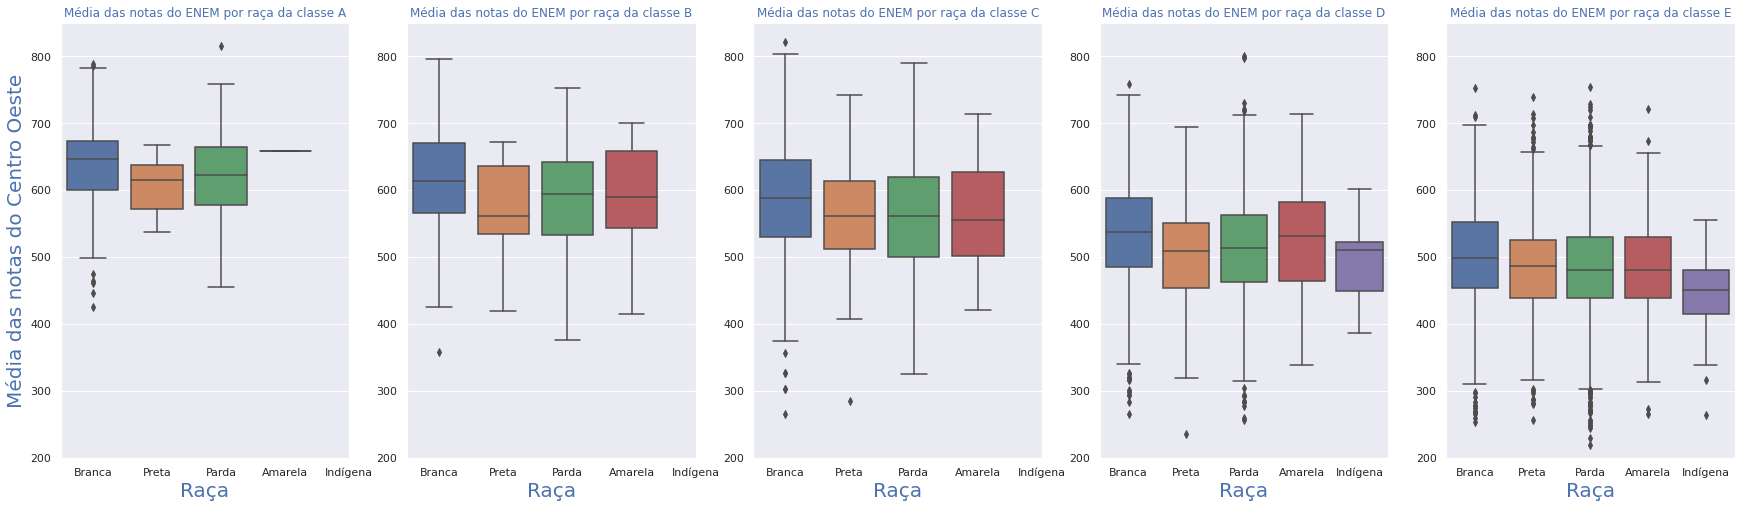

In [248]:
#@title Histograma da nota dos candidatos por raça divididos por classe da região Centro Oeste
plt.figure(figsize=(30,8))
plt.subplot(1,5,1)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "A"').query('REGIAO_FED == "centro_oeste"'))
plt.title('Média das notas do ENEM por raça da classe A',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Média das notas do Centro Oeste',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.subplot(1,5,2)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "B"').query('REGIAO_FED == "centro_oeste"'))
plt.title('Média das notas do ENEM por raça da classe B',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,3)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "C"').query('REGIAO_FED == "centro_oeste"'))
plt.title('Média das notas do ENEM por raça da classe C',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,4)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "D"').query('REGIAO_FED == "centro_oeste"'))
plt.title('Média das notas do ENEM por raça da classe D',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,5)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "E"').query('REGIAO_FED == "centro_oeste"'))
plt.title('Média das notas do ENEM por raça da classe E',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.show()

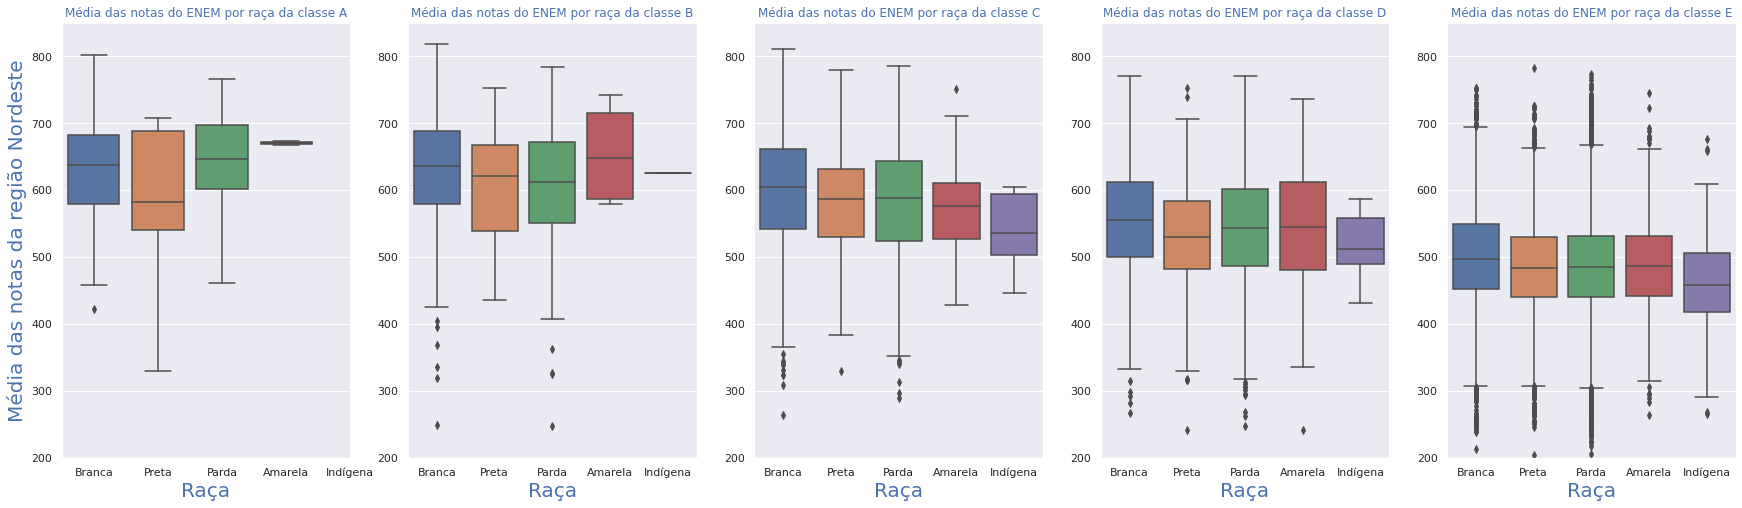

In [257]:
#@title Histograma da nota dos candidatos por raça divididos por classe da região Nordeste
plt.figure(figsize=(30,8))
plt.subplot(1,5,1)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "A"').query('REGIAO_FED == "nordeste"'))
plt.title('Média das notas do ENEM por raça da classe A',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Média das notas da região Nordeste',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.subplot(1,5,2)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "B"').query('REGIAO_FED == "nordeste"'))
plt.title('Média das notas do ENEM por raça da classe B',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,3)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "C"').query('REGIAO_FED == "nordeste"'))
plt.title('Média das notas do ENEM por raça da classe C',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,4)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "D"').query('REGIAO_FED == "nordeste"'))
plt.title('Média das notas do ENEM por raça da classe D',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,5)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "E"').query('REGIAO_FED == "nordeste"'))
plt.title('Média das notas do ENEM por raça da classe E',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.show()

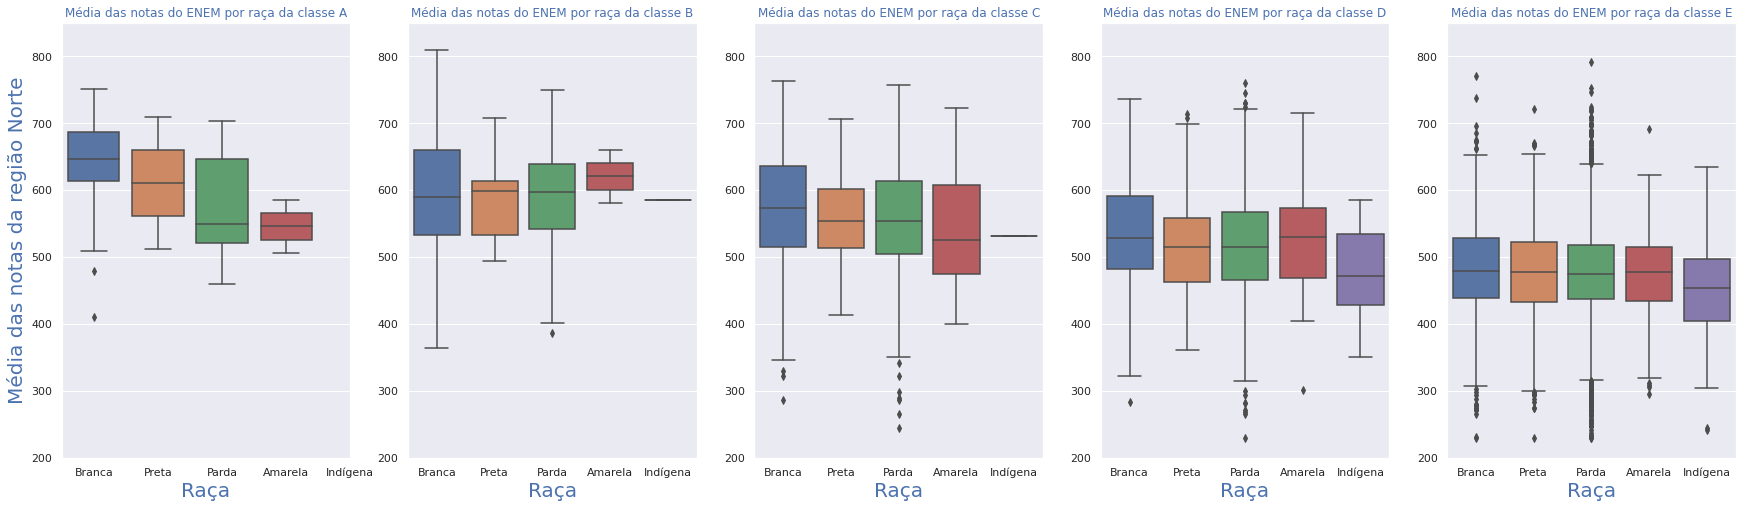

In [256]:
#@title Histograma da nota dos candidatos por raça divididos por classe da região Norte
plt.figure(figsize=(30,8))
plt.subplot(1,5,1)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "A"').query('REGIAO_FED == "norte"'))
plt.title('Média das notas do ENEM por raça da classe A',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Média das notas da região Norte',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.subplot(1,5,2)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "B"').query('REGIAO_FED == "norte"'))
plt.title('Média das notas do ENEM por raça da classe B',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,3)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "C"').query('REGIAO_FED == "norte"'))
plt.title('Média das notas do ENEM por raça da classe C',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,4)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "D"').query('REGIAO_FED == "norte"'))
plt.title('Média das notas do ENEM por raça da classe D',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,5)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "E"').query('REGIAO_FED == "norte"'))
plt.title('Média das notas do ENEM por raça da classe E',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.show()

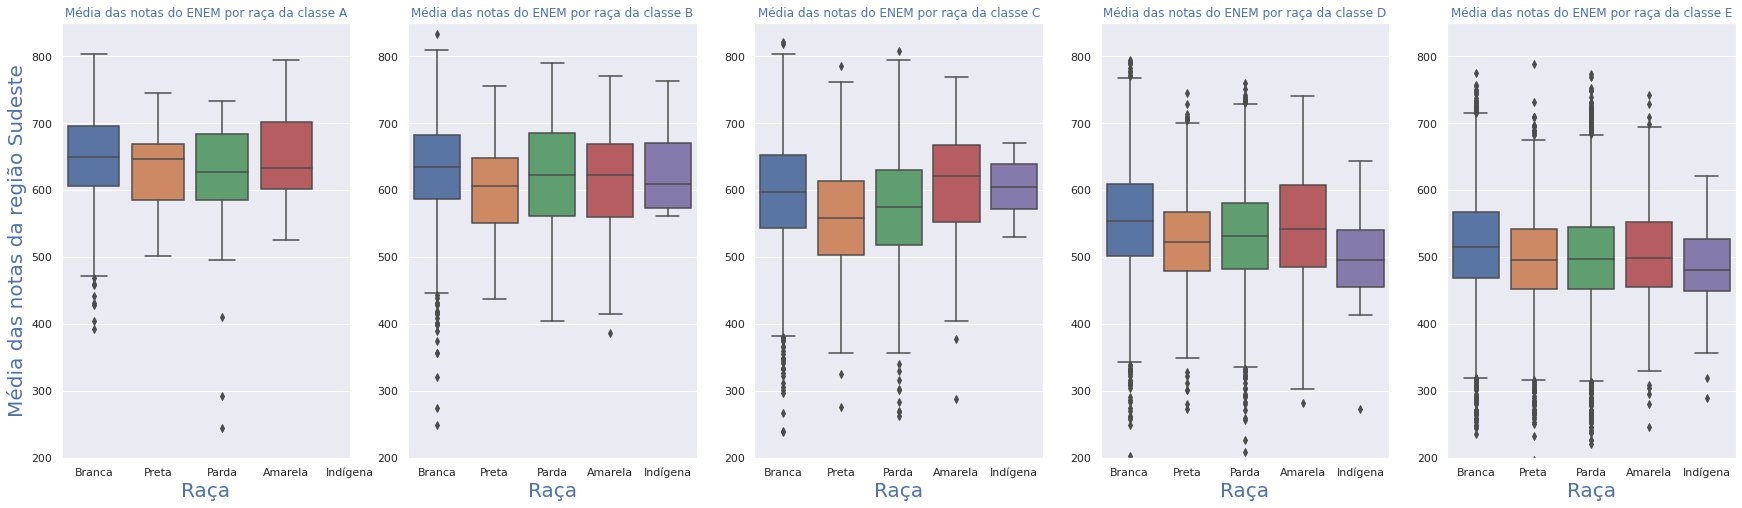

In [255]:
#@title Histograma da nota dos candidatos por raça divididos por classe da região Sudeste
plt.figure(figsize=(30,8))
plt.subplot(1,5,1)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "A"').query('REGIAO_FED == "sudeste"'))
plt.title('Média das notas do ENEM por raça da classe A',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Média das notas da região Sudeste',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.subplot(1,5,2)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "B"').query('REGIAO_FED == "sudeste"'))
plt.title('Média das notas do ENEM por raça da classe B',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,3)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "C"').query('REGIAO_FED == "sudeste"'))
plt.title('Média das notas do ENEM por raça da classe C',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,4)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "D"').query('REGIAO_FED == "sudeste"'))
plt.title('Média das notas do ENEM por raça da classe D',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,5)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "E"').query('REGIAO_FED == "sudeste"'))
plt.title('Média das notas do ENEM por raça da classe E',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.show()

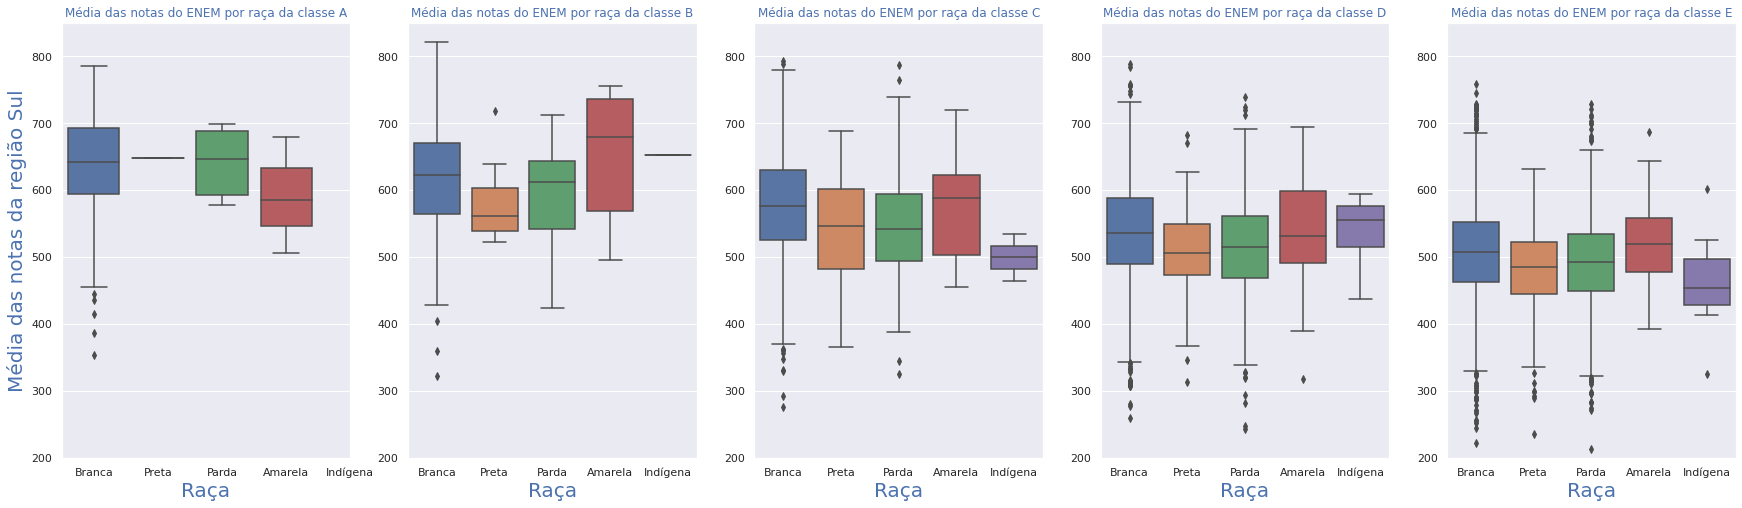

In [254]:
#@title Histograma da nota dos candidatos por raça divididos por classe da região Sul
plt.figure(figsize=(30,8))
plt.subplot(1,5,1)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "A"').query('REGIAO_FED == "sul"'))
plt.title('Média das notas do ENEM por raça da classe A',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('Média das notas da região Sul',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.subplot(1,5,2)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "B"').query('REGIAO_FED == "sul"'))
plt.title('Média das notas do ENEM por raça da classe B',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,3)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "C"').query('REGIAO_FED == "sul"'))
plt.title('Média das notas do ENEM por raça da classe C',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,4)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "D"').query('REGIAO_FED == "sul"'))
plt.title('Média das notas do ENEM por raça da classe D',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)

plt.subplot(1,5,5)
sns.boxplot(x='TP_COR_RACA', y = 'NU_NOTA_MEDIA', 
            data = dados_classe_regiao_sz.query('TP_COR_RACA != 0').query('CLASSE == "E"').query('REGIAO_FED == "sul"'))
plt.title('Média das notas do ENEM por raça da classe E',{'size':12}).set_color('b')
plt.xticks(np.arange(5), raca_dict)
plt.ylabel('',{'size':20}).set_color('b')
plt.xlabel('Raça',{'size':20}).set_color('b')
plt.ylim(200,850)


plt.show()

#### Conclusão: Nota-se na região Norte uma discrepância das notas da raça branca apenas na classe A. Nas demais classes desta região os valores ficam mais homogêneos. Na região Centro Oeste percebe-se um melhor resultado dos candidatos da raça branca em quase todas as classes, porém quanto menor a classe, menor a diferença de notas. A classe E de todas as regiões apresenta uma maior homogeneidade nas notas o que deixa claro que a diferença não se dá pela raça, em termos genéticos, mas sim pelo racismo estrutural presente na nossa sociedade em que há "espaços" de branco e "espaços" de preto/pardo nas comunidades, mais bem definidos nas classes mais altas, provavelmente gerando essa discrepância.
#### Lembro que durante minha faculdade, que não era um ambiente de classe A, mas de classes B e C me chocava perceber que havia aproximadamente 1 a 2 negros por turmas de 50-60 alunos.
#### As regiões sul e sudeste aparentam ter uma maior homogeneidade nas notas por raça em todas as classes.